In [1]:
import os

import imageio
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import qutip
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter, LinearLocator
from tqdm import tqdm

### Exercise 18:

Plot $\langle \Psi | X | \Psi \rangle$ as a function of the angles $\theta$ and $\phi$. Compare it to the previously calculated $\langle \Psi | Z | \Psi \rangle$. Do both quantities behave as $X$- and $Z$-projection of a classical arrow with a unit length?

In [2]:
steps = 50


def generate_surface(cost_function):
    Z = []
    Z_assembler = []

    X = np.linspace(0, np.pi, steps)
    Y = np.linspace(0, 2 * np.pi, steps)
    X, Y = np.meshgrid(X, Y)

    for x in X[0, :]:
        for y in Y[:, 0]:
            Z_assembler.append(cost_function(x, y))
        Z.append(Z_assembler)
        Z_assembler = []

    Z = np.asarray(Z)
    return Z

In [3]:
# precede the number with zeros, creating a thong of a certain length
def makeIndexOfLength(index, length):
    indexStr = str(index)
    return "0" * (length - len(indexStr)) + indexStr

In [4]:
def cost(theta, phi):
    return np.sin(theta) * np.cos(phi)

In [5]:
surface = generate_surface(cost)

In [6]:
OUTPUT_DIR = "psi_x_psi"
os.makedirs(OUTPUT_DIR, exist_ok=True)

for angle in tqdm(range(0, 180)):
    X = np.linspace(0, np.pi, steps)
    Y = np.linspace(0, 2 * np.pi, steps)
    X, Y = np.meshgrid(X, Y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    surf = ax.plot_surface(
        X,
        Y,
        surface,
        rstride=1,
        cstride=1,
        cmap=plt.get_cmap("rainbow"),
        linewidth=0,
        antialiased=False,
        alpha=0.6,
    )
    ax.set_zlim(-1, 1)
    ax.set_xlabel("θ")
    ax.set_ylabel("φ")
    ax.set_zlabel("sinθ . cosφ")
    ax.view_init(30 + (90 - angle) / 5, 45 + angle * 2)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
    plt.savefig("./" + OUTPUT_DIR + "/" + makeIndexOfLength(angle, 3) + ".png")
    plt.close()

100%|█████████████████████████████████████████| 180/180 [00:35<00:00,  5.09it/s]


Once the above cell is executed, a directory named `psi_x_psi` is created. Now in a terminal write the command `convert -delay 10 -loop 0 ./psi_x_psi/*.png psi_x_psi.gif` to generate corresponding gif which is shown below:

![psi_x_psi](psi_x_psi.gif)

### Exercise 33:

Now let's try a slightly more complicated rotation. Clearly, $\hat{M} = (\hat{X} + \hat{Z})/2$ is a hermitian operator, so we can define a rotation $\exp(-i\alpha\hat{M}/2)$. Figure out what it does.

Hint: one way to approach this exercise is to figure out eigenvectors of $\hat{M}$ and find the matrix exponent this way.

Eigenvalues: [-1.  1.]
Eigenstates: [Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[ 0.38268343]
  [-0.92387953]]
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.92387953]
  [-0.38268343]]                                                       ]


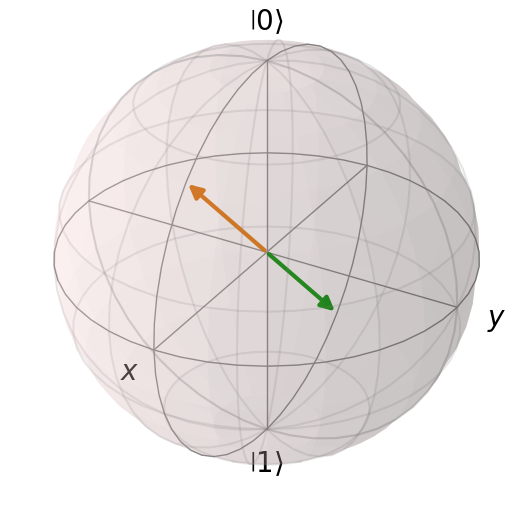

In [7]:
# First, we start with plotting the eigenstates of the operator

M = (qutip.sigmax() + qutip.sigmaz()) / np.sqrt(2)
eigvals, eigstates = M.eigenstates()

print("Eigenvalues:", eigvals)
print("Eigenstates:", eigstates)

b = qutip.Bloch()
b.make_sphere()
b.add_states(eigstates)
b.render()
b.show()

In [8]:
def animate_bloch(states, eig_states, name, duration=0.1, save_all=False):

    b = qutip.Bloch()
    b.vector_color = ["r"]
    # b.view = [-40,30]
    images = []

    try:
        length = len(states)
    except:
        length = 1
        states = [states]
    ## normalize colors to the length of data ##
    # nrm = mpl.colors.Normalize(0,length)
    # colors = cm.cool(nrm(range(length))) # options: cool, summer, winter, autumn etc.

    ## customize sphere properties ##
    # b.point_color = [colors[0]] # options: 'r', 'g', 'b' etc.
    b.point_marker = ["o"]
    b.point_size = [25]

    for i in range(length):
        b.clear()
        b.add_states(eig_states)
        b.add_states(states[i])
        b.add_states(states[: (i + 1)], "point")
        if save_all:
            b.save(dirc="sphere")  # saving images to tmp directory
            filename = "sphere/bloch_%01d.png" % i
        else:
            filename = "temp_file.png"
            b.save(filename)
        images.append(imageio.v2.imread(filename))
    imageio.mimsave(f"{name}.gif", images, duration=duration)

In [9]:
up = qutip.basis(2, 0)  # |0>

bloch_states = []

# generate and store states for alpha
for alpha in np.linspace(0.0, 2 * np.pi, 50):
    rotate_M = (-1j * alpha * M / 2).expm()
    psi = rotate_M * up
    bloch_states.append(psi)

In [10]:
animate_bloch(bloch_states, eigstates, "m_x_z")

The animated bloch sphere is shown below. The axis lies in the X-Z plane as $\phi = 0$.

<div align="center">
<img width="400" src="m_x_z.gif" /><br>
</div>

Verify $\exp(-i\alpha\hat{M}/2)$ is equal to the calculation done by hand by using the equation below:

\begin{equation}
f(\hat{H}) = \sum_i f(h_i) |h_i\rangle\langle h_i|.
\end{equation}

which gave the eigenvalues $\{+1, -1\}$ and eigenvectors

\begin{align*} 
| H_+ \rangle = cos\left(\frac{\pi}{8} \right) |0 \rangle + sin \left( \frac{\pi}{8} \right) |1\rangle \\
| H_- \rangle = -sin \left( \frac{\pi}{8} \right) |0 \rangle + cos\left(\frac{\pi}{8} \right) |1\rangle
\end{align*}

\begin{equation}
\exp(-i\alpha\hat{M}/2) = \exp(-i\alpha/2)| H_+ \rangle \langle H_+ | + \exp(i\alpha/2)| H_- \rangle \langle H_- |
\end{equation}

In [11]:
c = np.cos(np.pi / 8)
s = np.sin(np.pi / 8)

m1 = np.array([[c**2, s * c], [c * s, s**2]])
m2 = np.array([[s**2, -s * c], [-s * c, c**2]])

for alpha in np.linspace(0.0, 2 * np.pi, 50):
    rotate_M = (-1j * alpha * M / 2).expm()
    U = np.exp(-1j * alpha / 2) * m1 + np.exp(1j * alpha / 2) * m2
    assert np.allclose(rotate_M.full(), U) == True

### Exercise 35:

Consider another unitary operator $\exp(-i\alpha\hat{M}/2)$, where $\hat{M} = (\hat{X} + \hat{Y})/\sqrt{2}$. What kind of rotation on the Bloch sphere is it?

Eigenvalues: [-1.  1.]
Eigenstates: [Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.70710678+0.j ]
  [ 0.5       +0.5j]]
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.70710678+0.j ]
  [-0.5       -0.5j]]                                                  ]


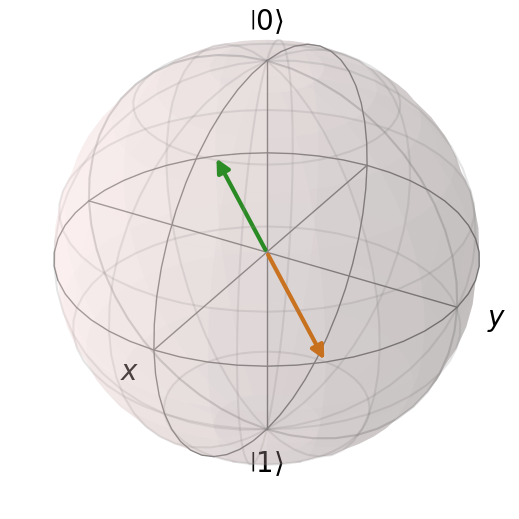

In [12]:
# First, we start with plotting the eigenstates of the operator
M = (qutip.sigmax() + qutip.sigmay()) / np.sqrt(2)
eigvals, eigstates = M.eigenstates()
print("Eigenvalues:", eigvals)
print("Eigenstates:", eigstates)

b = qutip.Bloch()
b.make_sphere()
b.add_states(eigstates)
b.render()
b.show()

In [13]:
alpha = np.pi / 2
rotate_M = (-1j * alpha * M / 2).expm()
up = qutip.basis(2, 0)  # |0>
bloch_states = []
for alpha in np.linspace(0.0, 2 * np.pi, 50):
    rotate_M = (-1j * alpha * M / 2).expm()
    psi = rotate_M * up
    bloch_states.append(psi)

animate_bloch(bloch_states, eigstates, "m_x_y")

The animated bloch sphere is shown below. The axis lies in the X-Y plane as $\phi = \pm \pi/4$ and $\theta = \pi/2$.

<div align="center">
<img width="400" src="m_x_y.gif" /><br>
</div>